In [ ]:
!pip install tensorflow==2.8.3

     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/498.5 MB 13.5 MB/s eta 0:00:32
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 466, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(nbytes, b

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import keras
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
import numpy as np
import os
import gdown
import zipfile
import shutil
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
# Mengunduh file menggunakan gdown
gdown.download('https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9', '/content/data.zip', quiet=False)
# Ekstrak file zip
local_zip = '/content/data.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('dataset')

Downloading...
From (original): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9
From (redirected): https://drive.google.com/uc?id=1RiUNRaQ4TVyt4vfUzIBHsAdrg0E6d6f9&confirm=t&uuid=e98ba9b5-8344-493d-9d1c-be6afa17840a
To: /content/data.zip
100%|██████████| 3.23G/3.23G [00:35<00:00, 92.0MB/s]


In [ ]:
# Path ke dataset yang diekstraksi
dataset_path = 'dataset'
organized_dataset_path = 'organized_dataset'

# Membuat direktori baru untuk dataset yang diatur ulang
os.makedirs(organized_dataset_path, exist_ok=True)

# Mengidentifikasi dan memindahkan gambar ke subfolder berdasarkan huruf pertama
for file_name in os.listdir(dataset_path):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        label = file_name[0]  # Mengambil karakter pertama dari nama file
        label_folder = os.path.join(organized_dataset_path, label)
        os.makedirs(label_folder, exist_ok=True)
        shutil.move(os.path.join(dataset_path, file_name), os.path.join(label_folder, file_name))

In [ ]:
# Direktori untuk training dan validation
train_path = 'dataset/train'
val_path = 'dataset/validation'

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Membuat subfolder untuk setiap alfabet di dalam training dan validation
for label in os.listdir(organized_dataset_path):
    os.makedirs(os.path.join(train_path, label), exist_ok=True)
    os.makedirs(os.path.join(val_path, label), exist_ok=True)

    # Mendapatkan semua file dalam subfolder
    file_names = os.listdir(os.path.join(organized_dataset_path, label))

    # Membagi file menjadi training dan validation sets
    train_files, val_files = train_test_split(file_names, test_size=0.2, random_state=42)

    # Memindahkan file ke masing-masing folder
    for file_name in train_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(train_path, label, file_name))
    for file_name in val_files:
        shutil.move(os.path.join(organized_dataset_path, label, file_name), os.path.join(val_path, label, file_name))

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


validation_split =0.2 #0.3
#import for training dataset
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

#import for validation dataset
validation_set = validation_datagen.flow_from_directory('dataset/validation',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
#STEP_SIZE_TEST=test_set.n//test_set.batch_size
validation_set.class_indices
#indices the label


Found 3108 images belonging to 26 classes.
Found 777 images belonging to 26 classes.


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
# Set image size
IMAGE_SIZE = [128, 128]

# Initiate InceptionV3 model, pre-trained on ImageNet, excluding the top layers
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of InceptionV3 to prevent them from training
for layer in inception.layers:
    layer.trainable = False

# Add custom layers on top of the InceptionV3 base
x = Flatten()(inception.output)
prediction = Dense(26, activation='softmax')(x)  # Number of classes is 26

# Create the final model
model = Model(inputs=inception.input, outputs=prediction)

# Compile the model
model.compile(loss='categorical_crossentropy',  # Categorical cross-entropy for multi-class classification
              optimizer=tf.optimizers.Adam(0.001),  # Adam optimizer with learning rate of 0.001
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
model_fit = model.fit(training_set, epochs = 50, #itteration for training
                     validation_data = validation_set)

Epoch 1/50
3108/3108 [==============================] - 154s 46ms/step - loss: 22.0035 - accuracy: 0.2091 - val_loss: 19.7105 - val_accuracy: 0.3153
Epoch 2/50
3108/3108 [==============================] - 127s 41ms/step - loss: 12.9759 - accuracy: 0.4804 - val_loss: 17.4890 - val_accuracy: 0.4144
Epoch 3/50
3108/3108 [==============================] - 124s 40ms/step - loss: 9.4376 - accuracy: 0.6033 - val_loss: 22.7837 - val_accuracy: 0.3964
Epoch 4/50
3108/3108 [==============================] - 142s 46ms/step - loss: 7.5990 - accuracy: 0.6979 - val_loss: 25.5021 - val_accuracy: 0.3912
Epoch 5/50
3108/3108 [==============================] - 146s 47ms/step - loss: 6.3852 - accuracy: 0.7342 - val_loss: 22.4496 - val_accuracy: 0.4427
Epoch 6/50
3108/3108 [==============================] - 143s 46ms/step - loss: 5.1003 - accuracy: 0.7902 - val_loss: 23.9849 - val_accuracy: 0.4453
Epoch 7/50
3108/3108 [==============================] - 122s 39ms/step - loss: 4.2238 - accuracy: 0.8124 - val

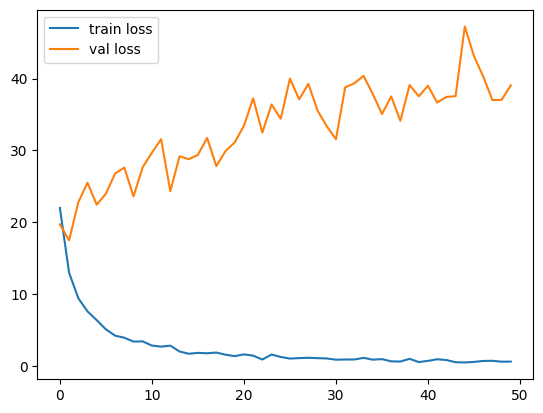

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], '',label='train loss')
plt.plot(model_fit.history['val_loss'], '' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



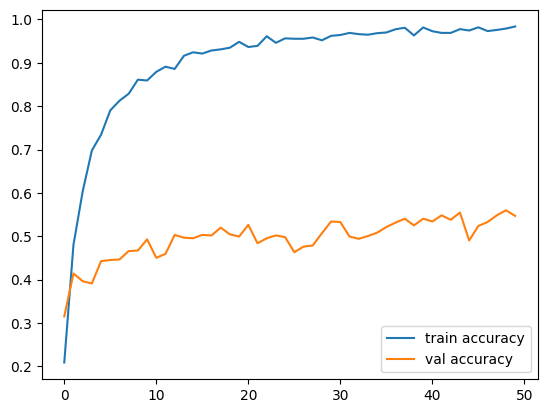

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(model_fit.history['accuracy'], '',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Saving M (25).jpg to M (25).jpg
1/1 [==============================] - 1s 1s/step


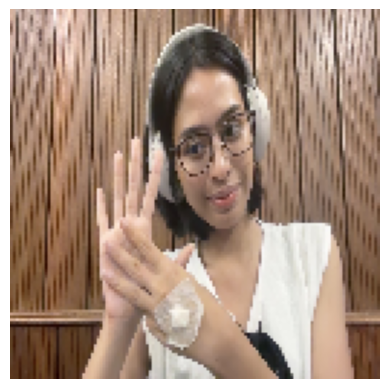

A: 0.00%
B: 0.00%
C: 0.00%
D: 0.00%
E: 0.00%
F: 0.00%
G: 0.00%
H: 0.00%
I: 0.00%
J: 0.00%
K: 0.00%
L: 0.00%
M: 3.72%
N: 0.00%
O: 0.00%
P: 0.00%
Q: 0.00%
R: 0.00%
S: 0.00%
T: 0.00%
U: 96.28%
V: 0.00%
W: 0.00%
X: 0.00%
Y: 0.00%
Z: 0.00%


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
uploaded = files.upload()
labels = training_set.class_indices.keys()

for paths in uploaded.keys():
    path = paths
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    proba = model.predict(images)[0]

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))

import os
os.remove(path)

In [ ]:
model.save('modelInception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelVGG.tflite', 'wb') as f:
    f.write(tflite_model)